In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Einlesen der daten und speichern als Dataframe mit dem Namen df
df = pd.read_excel('fruit_data.xlsx')
#Ausgeben des Dataframes
df

# Gruppiere Daten nach Fruchttyp
grouped_data = df.groupby('fruit_type')

# Definiere eine Farbpalette für die Früchte
fruit_colors = {'grape': 'purple', 'apple': 'red', 'banana': 'yellow'}

In [2]:
df.head()

,Unnamed: 0,fruit_type,color,size,weight
0,0,grape,Yellow,Tiny,8.303385
1,1,apple,Pink,Largee,80.976370
2,2,banana,Pale Yellow,Large,74.615192
3,3,grape,Red,Tiny,6.924070
4,4,banana,Creamy White,Largee,82.002542


In [3]:
#Analysieren ob Null-Werte im Dataframe existieren 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   fruit_type  200 non-null    object 
 2   color       200 non-null    object 
 3   size        200 non-null    object 
 4   weight      200 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


In [4]:
#deskriptive Statistik für weight 
df['weight'].describe() 

count    200.000000
mean      59.047220
std       46.697739
min        1.000000
25%        8.142752
50%       63.109415
75%       94.367815
max      250.000000
Name: weight, dtype: float64

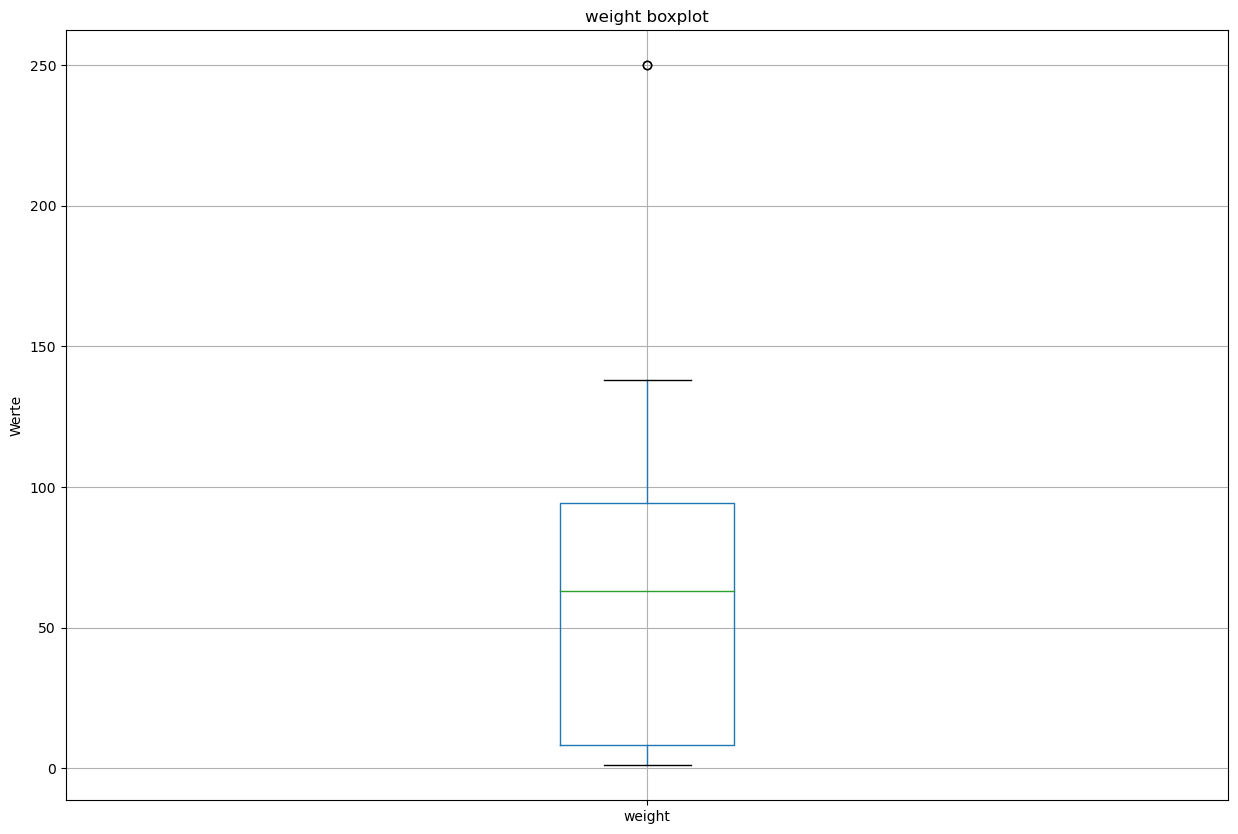

In [5]:
#zeigt das Merkmal anhand eines Boxplots, um die Ausreißer besser zu identifizieren
df.boxplot(column=['weight'], figsize=(15, 10))
plt.ylabel('Werte')
plt.title('weight boxplot')
plt.show()

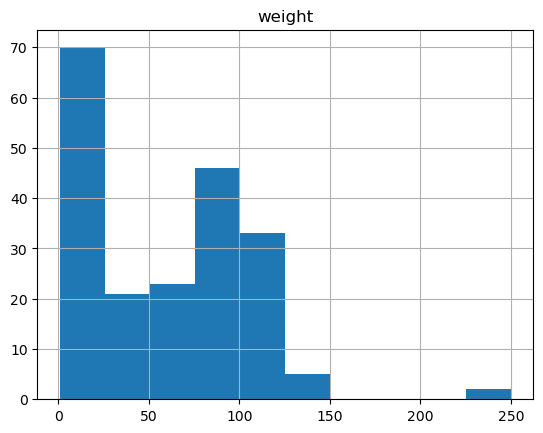

In [6]:
#zeigt die Häufigkeitsverteilung für das Merkmal 'weight' in einem Histogramm
df.hist(column = 'weight', bins = 10)

plt.show()

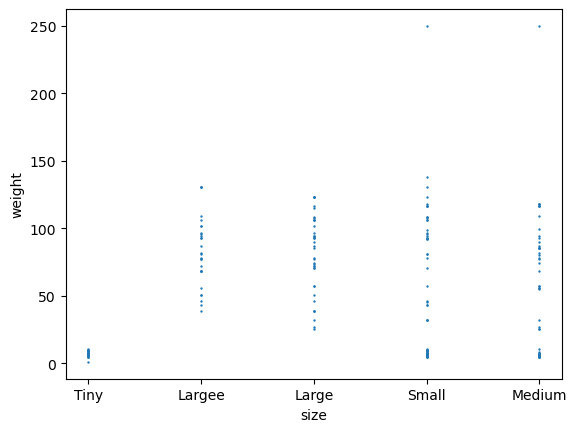

In [7]:
#scatter plot für „size" und „weight" 
scatter = df.plot.scatter(x='size', y='weight', s= 0.5,
                           colormap='viridis',sharex=False)

plt.show()

In [8]:
# Bereinige die Farben --> Yellow1 in Yellow 
df['color'] = df['color'].replace({'Yellow1': 'Yellow'})

# Bereinige die Größen --> Largee in Large 
df['size'] = df['size'].replace({'Largee': 'Large'})

In [9]:
print(df.head(30))

    Unnamed: 0 fruit_type         color    size      weight
0            0      grape        Yellow    Tiny    8.303385
1            1      apple          Pink   Large   80.976370
2            2     banana   Pale Yellow   Large   74.615192
3            3      grape           Red    Tiny    6.924070
4            4     banana  Creamy White   Large   82.002542
5            5     banana         Green   Large   89.719116
6            6      apple         Green   Large   72.036243
7            7      grape         Green   Small    5.371310
8            8      apple          Pink   Large   87.272178
9            9      grape           Red   Small    7.409021
10          10     banana  Creamy White   Large   77.121200
11          11      apple         Green   Large  123.068395
12          12      grape           Red    Tiny    7.210974
13          13      apple        Yellow   Large  130.721867
14          14     banana        Yellow   Large   39.072447
15          15      grape        Purple 

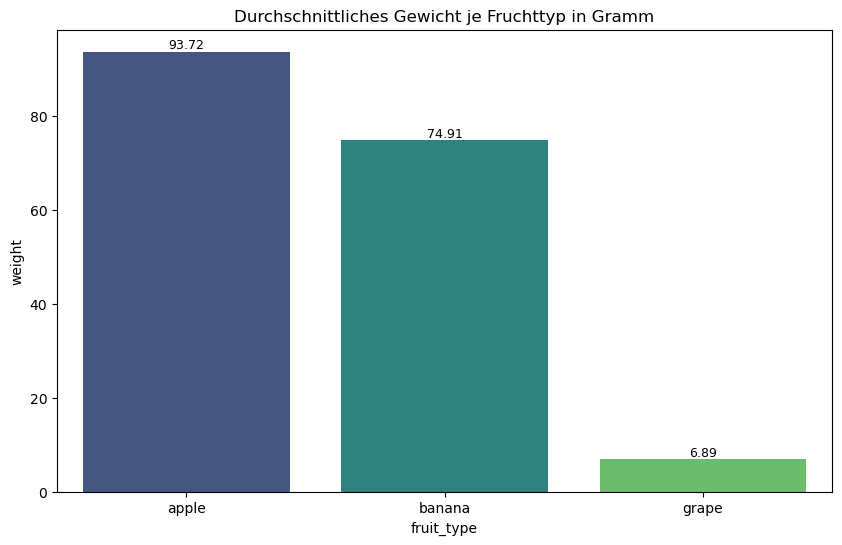

In [10]:
# Gruppiere Daten nach Fruchttyp und berechne den Durchschnitt für jedes Gewicht (weight)
average_weight_per_fruit = df.groupby('fruit_type')['weight'].mean().reset_index()

# Visualisierung der durchschnittlichen Gewichte
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='fruit_type', y='weight', data=average_weight_per_fruit, palette='viridis')
plt.title('Durchschnittliches Gewicht je Fruchttyp in Gramm')

# Fügung der Durchschnittswerte in die Balken 
for index, value in enumerate(average_weight_per_fruit['weight']):
    barplot.text(index, value, round(value, 2), ha="center", va="bottom", fontsize=9)

plt.show()

In [11]:
# Berechnung vom Z-Score für die 'weight'-Spalte
z_scores = stats.zscore(df['weight'])

# Schwellenwert für den Z-Score fest setzen (in dem Beispiel 3)
threshold = 3


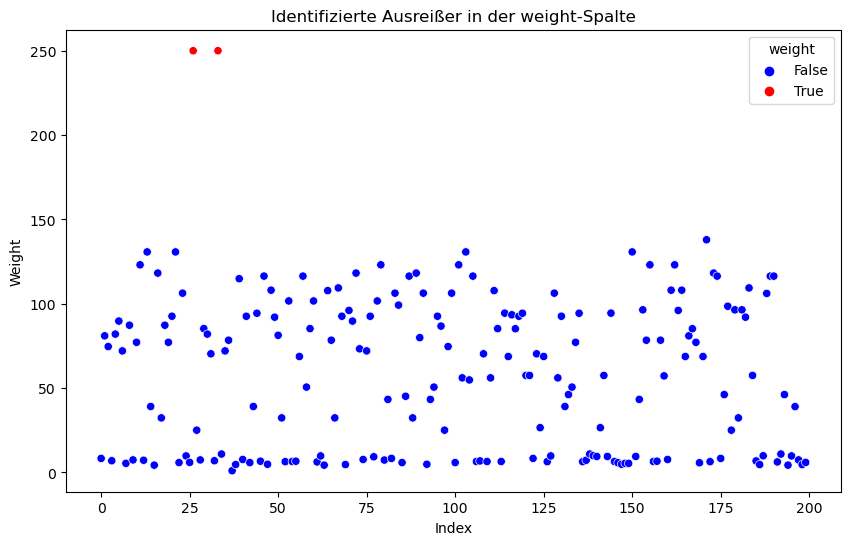

In [12]:
# Identifizierung Ausreißer
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)

# Visualisierung der Ausreißer
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['weight'], hue=outlier_indices, palette={True: 'red', False: 'blue'})
plt.title('Identifizierte Ausreißer in der weight-Spalte')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.show()

In [13]:
# Ersetzung der Ausreißer durch den Mittelwert der 'weight'-Spalte
df.loc[outlier_indices, 'weight'] = df['weight'].mean()

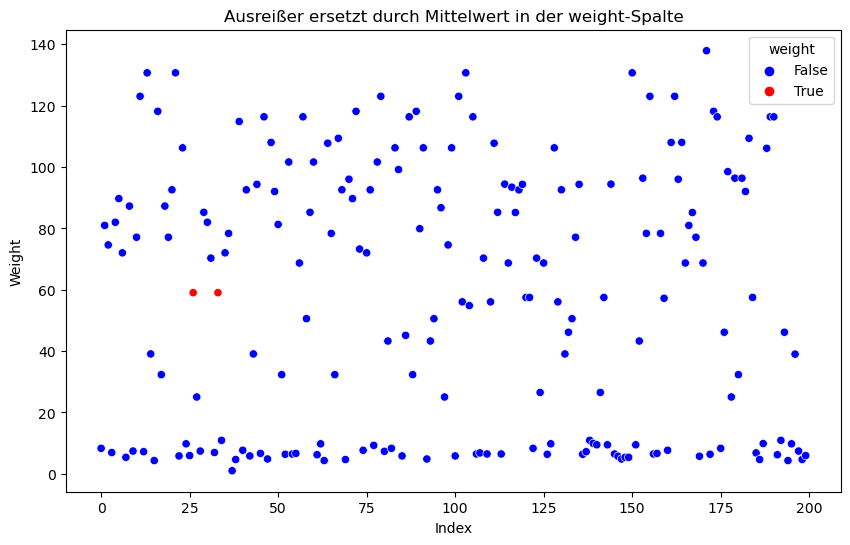

In [14]:
# Visualisierung der Änderung
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['weight'], hue=outlier_indices, palette={True: 'red', False: 'blue'})
plt.title('Ausreißer ersetzt durch Mittelwert in der weight-Spalte')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.show()

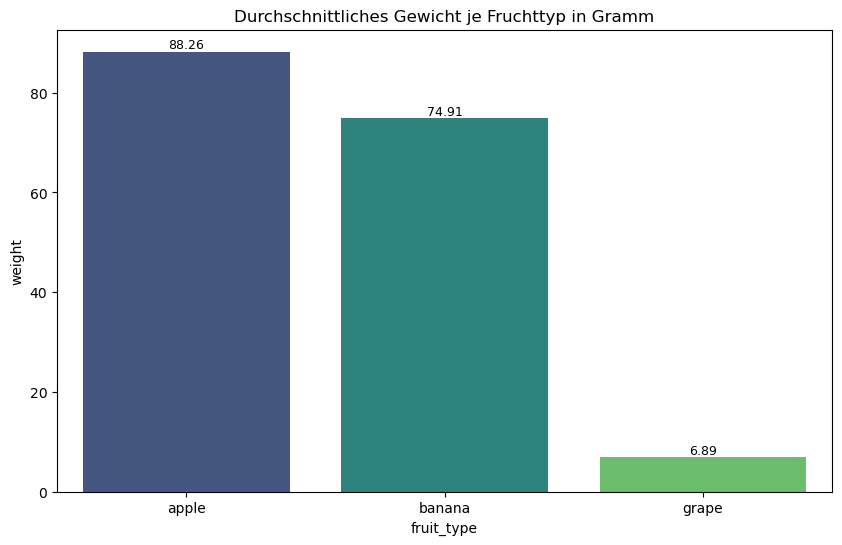

In [15]:
# Gruppierung der Daten nach Fruchttyp und berechnung vom Durchschnitt für jedes Gewicht
average_weight_per_fruit = df.groupby('fruit_type')['weight'].mean().reset_index()

# Visualisierung der durchschnittlichen Gewichte
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='fruit_type', y='weight', data=average_weight_per_fruit, palette='viridis')
plt.title('Durchschnittliches Gewicht je Fruchttyp in Gramm')

# Füge die Durchschnittswerte in die Balken ein
for index, value in enumerate(average_weight_per_fruit['weight']):
    barplot.text(index, value, round(value, 2), ha="center", va="bottom", fontsize=9)

plt.show()

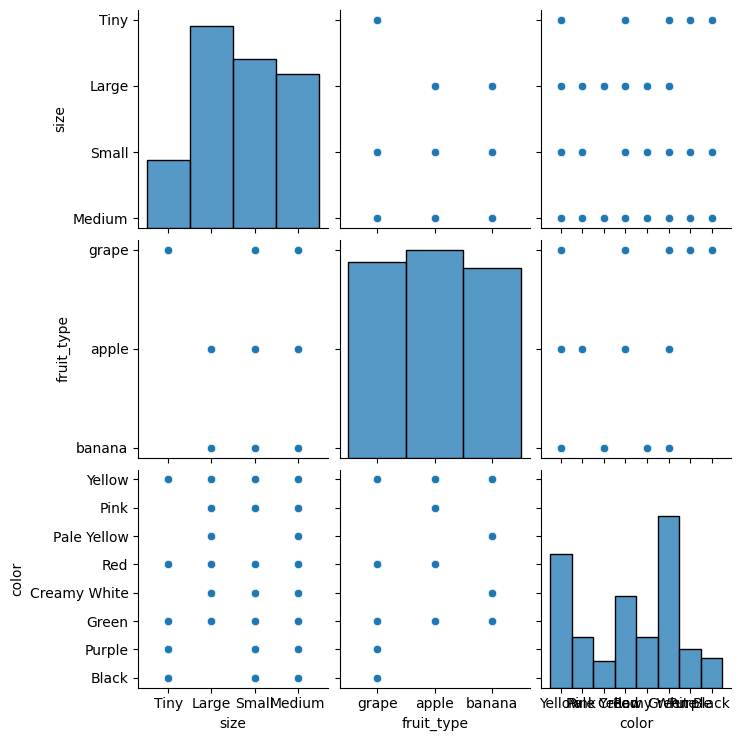

In [16]:
# Darstellung aller rows und columns 
sns.pairplot(df, vars=['size', 'fruit_type', 'color' ])
plt.show()

In [17]:
# Wandele kategorische Daten in numerische Werte um
le_color = LabelEncoder()
le_size = LabelEncoder()

df['color'] = le_color.fit_transform(df['color'])
df['size'] = le_size.fit_transform(df['size'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   fruit_type  200 non-null    object 
 2   color       200 non-null    int32  
 3   size        200 non-null    int32  
 4   weight      200 non-null    float64
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 6.4+ KB


In [19]:
# Aufteilung in Features (X) und Labels (y)
X = df[['color', 'size', 'weight']]
y = df['fruit_type']

In [20]:
# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Modell erstellen und trainieren
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
predictions = model.predict(X_test)

# Evaluierung des Modells
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7666666666666667
Confusion Matrix:
[[20  4  0]
 [10  8  0]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

       apple       0.67      0.83      0.74        24
      banana       0.67      0.44      0.53        18
       grape       1.00      1.00      1.00        18

    accuracy                           0.77        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



In [22]:
# Modell erstellen und trainieren (KNN)
knn_model = KNeighborsClassifier(n_neighbors=2)  # Du kannst die Anzahl der Nachbarn anpassen
knn_model.fit(X_train, y_train)

# Vorhersagen
y_pred_knn = knn_model.predict(X_test)

# Modellbewertung
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

# Ausgabe der Bewertungen
print("Accuracy (KNN):", accuracy_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)
print("Classification Report (KNN):")
print(classification_report_knn)

Accuracy (KNN): 0.8
Confusion Matrix (KNN):
[[19  5  0]
 [ 7 11  0]
 [ 0  0 18]]
Classification Report (KNN):
              precision    recall  f1-score   support

       apple       0.73      0.79      0.76        24
      banana       0.69      0.61      0.65        18
       grape       1.00      1.00      1.00        18

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [23]:
# Modell erstellen und trainieren (Logistische Regression)
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Vorhersagen
y_pred_logreg = logreg_model.predict(X_test)

# Modellbewertung
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

# Ausgabe der Bewertungen
print("Accuracy (Logistische Regression):", accuracy_logreg)
print("Confusion Matrix (Logistische Regression):")
print(conf_matrix_logreg)
print("Classification Report (Logistische Regression):")
print(classification_report_logreg)

Accuracy (Logistische Regression): 0.7
Confusion Matrix (Logistische Regression):
[[16  8  0]
 [10  8  0]
 [ 0  0 18]]
Classification Report (Logistische Regression):
              precision    recall  f1-score   support

       apple       0.62      0.67      0.64        24
      banana       0.50      0.44      0.47        18
       grape       1.00      1.00      1.00        18

    accuracy                           0.70        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



c:\Users\samiu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Logistische Grid Search-Vorgang 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


In [25]:
# Modell erstellen und trainieren (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Vorhersagen
y_pred_dt = dt_model.predict(X_test)

# Modellbewertung
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

# Ausgabe der Bewertungen
print("Accuracy (Decision Tree):", accuracy_dt)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)
print("Classification Report (Decision Tree):")
print(classification_report_dt)

Accuracy (Decision Tree): 0.7833333333333333
Confusion Matrix (Decision Tree):
[[19  5  0]
 [ 8 10  0]
 [ 0  0 18]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

       apple       0.70      0.79      0.75        24
      banana       0.67      0.56      0.61        18
       grape       1.00      1.00      1.00        18

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



In [26]:
# Modell erstellen und trainieren (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Vorhersagen
y_pred_svm = svm_model.predict(X_test)

# Modellbewertung
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Ausgabe der Bewertungen
print("Accuracy (SVM):", accuracy_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)
print("Classification Report (SVM):")
print(classification_report_svm)

Accuracy (SVM): 0.7
Confusion Matrix (SVM):
[[15  9  0]
 [ 9  9  0]
 [ 0  0 18]]
Classification Report (SVM):
              precision    recall  f1-score   support

       apple       0.62      0.62      0.62        24
      banana       0.50      0.50      0.50        18
       grape       1.00      1.00      1.00        18

    accuracy                           0.70        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.70      0.70      0.70        60



In [27]:
#TODO 